In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import cv2 as cv

In [2]:
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.fashion_mnist.load_data()

In [4]:
x_train = x_train/255
x_test = x_test/255

In [6]:
print(x_train[10].min())
print(x_train[10].max())

0.0
1.0


In [8]:
from sklearn import svm

In [14]:
no_of_samples = len(x_train)

In [15]:
x_train = x_train.reshape((no_of_samples, -1))

In [25]:
clasi_svm = svm.LinearSVC(dual=False)
clasi_svm.fit(x_train,y_train)

LinearSVC(dual=False)

In [18]:
x_test = x_test.reshape((len(x_test), -1))


In [26]:
pred = clasi_svm.predict(x_test)

In [27]:
from sklearn import metrics
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.97      0.95      0.96      1000
           2       0.71      0.73      0.72      1000
           3       0.82      0.86      0.84      1000
           4       0.72      0.78      0.75      1000
           5       0.94      0.92      0.93      1000
           6       0.65      0.51      0.57      1000
           7       0.91      0.94      0.92      1000
           8       0.92      0.94      0.93      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , pred)

0.8402

Prediction from test data

In [33]:
predict_1  = clasi_svm.predict(x_test[10].reshape(1,-1))

In [34]:
print(predict_1 , y_test[10])

[4] 4


Predction from google image

In [46]:
from matplotlib.pyplot import *

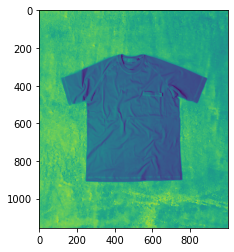

In [66]:
img_src = '/content/photo-1633966887768-64f9a867bdba.jpg'
im = cv.imread(img_src , 0)
imshow(im)

(28, 28)


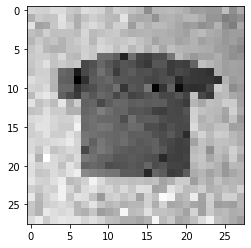

In [68]:
im = cv.resize(im ,(28,28))
print(im.shape)
imshow(im , cmap = 'gray')

In [69]:
clasi_svm.predict(im.reshape(1,-1))

array([8], dtype=uint8)

confustion matrix

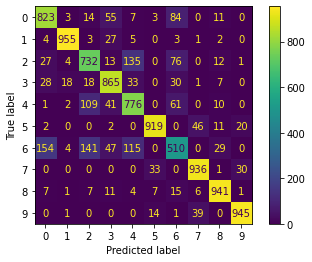

In [28]:
conf_matrix = metrics.ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [76]:
import pickle

pkl_file = "joblib_model.pkl"
with open(pkl_file , 'wb') as file:
     pickle.dump(clasi_svm, file )